In [30]:
# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

In [31]:
import os

DATA_PATH = "data"

def load_movie_list(path):
    """
    Reads the fixed movie list in movie_ids.txt and returns a list of movie names.
    Returns
    -------
    movieNames : list
        A list of strings, representing all movie names.
    """
    # Read the fixed movie list
    with open(os.path.join(path, 'movie_ids.txt'),  encoding='ISO-8859-1') as fid:
        movies = fid.readlines()

    movie_names = []
    for movie in movies:
        parts = movie.split()
        movie_names.append(' '.join(parts[1:]).strip())
    return movie_names

In [32]:
names = load_movie_list(DATA_PATH)

Average rating for movie index 12 ( Mighty Aphrodite (1995) ): 4.520679 / 5


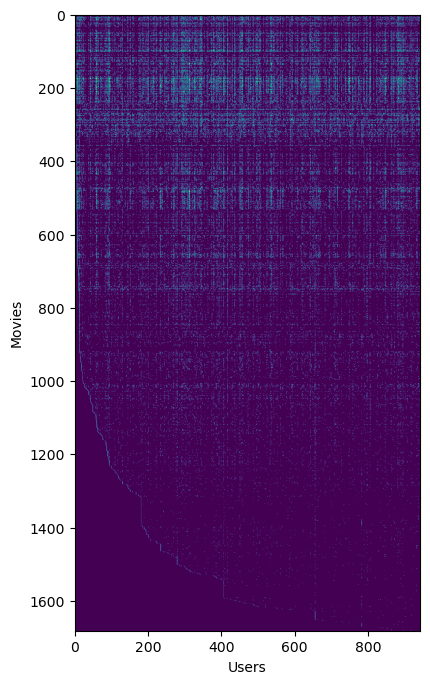

In [33]:
from matplotlib import pyplot as plt
import numpy as np

MOVIE_IDX=12

# Load data
data = loadmat(os.path.join(DATA_PATH, 'movies.mat'))
Y, R = data['Y'], data['R']

# Y is a 1682x943 matrix, containing ratings (1-5) of 
# 1682 movies on 943 users

# R is a 1682x943 matrix, where R(i,j) = 1 
# if and only if user j gave a rating to movie i

# From the matrix, we can compute statistics like average rating.
print(f'Average rating for movie index {MOVIE_IDX} (',names[MOVIE_IDX] ,'): %f / 5' %
np.mean(Y[MOVIE_IDX, R[0, :]]))

# We can "visualize" the ratings matrix by plotting it with imshow
plt.figure(figsize=(8, 8))
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')
plt.grid(False)

In [ ]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_):
    """
    Collaborative filtering cost function with regularization.
    """
    # Unfold the parameters
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    W = params[num_movies*num_features:].reshape(num_users, num_features)

    # Compute the cost
    error = np.dot(X, W.T) - Y
    J = 0.5 * np.sum((error ** 2) * R)

    # Add regularization to the cost
    J += (lambda_/2) * (np.sum(np.square(X)) + np.sum(np.square(W)))

    # Compute the gradients
    X_grad = np.dot(error * R, W)
    W_grad = np.dot((error * R).T, X)

    # Add regularization to the gradients
    X_grad += lambda_ * X
    W_grad += lambda_ * W

    # Unroll the gradient matrices into a vector for the optimization function
    grad = np.concatenate([X_grad.ravel(), W_grad.ravel()])

    return J, grad

In [38]:
# Import the load_movie_list function
# from utils import load_movie_list

# Load the list of movie names
movies = load_movie_list(DATA_PATH)

# Initialize my ratings
my_ratings = np.zeros(len(movies))

# Rate some movies:
my_ratings[240] = 4  # Rating "4" for movie with ID "240"
my_ratings[12] = 3   # Rating "3" for movie with ID "12"
my_ratings[96] = 5   # Rating "5" for movie with ID "96"
# Add more ratings based on your preference...

# Let's print the ratings that we added:
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print(f"Rated {int(my_ratings[i])} for {movies[i]}")

Rated 3 for Mighty Aphrodite (1995)
Rated 5 for Dances with Wolves (1990)
Rated 4 for Last of the Mohicans, The (1992)


In [39]:
movieList = load_movie_list(DATA_PATH)

movies_id_list = [0, 97, 6, 11, 53, 63, 65, 68, 182, 225, 354]

for movie in movies_id_list:
    print(movieList[movie])

Toy Story (1995)
Silence of the Lambs, The (1991)
Twelve Monkeys (1995)
Usual Suspects, The (1995)
Outbreak (1995)
Shawshank Redemption, The (1994)
While You Were Sleeping (1995)
Forrest Gump (1994)
Alien (1979)
Die Hard 2 (1990)
Sphere (1998)


In [ ]:
# Predict ratings for all movies and users
pred_ratings = np.dot(X, W.T)

# Add my ratings to the matrix
my_pred_ratings = pred_ratings[:, -1] + my_ratings

# Sort predicted ratings
idx = np.argsort(my_pred_ratings)[::-1]

# Print top 10 recommended movies
print("Top 10 movie recommendations:")
for i in range(10):
    j = idx[i]
    print(f"Predicted rating of {my_pred_ratings[j]:.1f} for movie {movies[j]}")